<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/Running_a_basic_RNN_model_on_sinewave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
tf.__version__

'2.1.0'

In [0]:
x = np.linspace(0,50,501)

In [5]:
print(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [0]:
Y = np.sin(x)

In [0]:
#Y

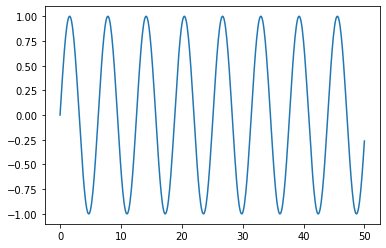

In [8]:
plt.plot(x,Y)

In [0]:
#creating a basic dataset
dataset = pd.DataFrame(data=Y,index=x,columns=['Sine'])

In [102]:
dataset

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [11]:
#Select some percent of the dataset for using to test the model. Lets select 10% from the end.
len(dataset)

501

In [0]:
test_point = np.round(0.1 * len(dataset))

In [13]:
test_point

50.0

In [0]:
test_ind = int(len(dataset) - test_point)

In [15]:
test_ind

451

In [0]:
train = dataset.iloc[:test_ind]
test = dataset.iloc[test_ind:]

In [17]:
test.shape

(50, 1)

## Next task is to scale the data. Since a RNN feeds back the data into the neuron we should scale the labels in 0,1

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)

In [0]:
scaled_test = scaler.transform(test)

### Next is to generate a sequence of historic labels and some points into the future.

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
#This class takes in a sequence of data-points gathered at
#equal intervals, along with time series parameters such as
#stride, length of history, etc., to produce batches for training/validation.

In [0]:
length = 50 # will take a length which covers the whole sequence cycle atleast once.
batch_size = 1

In [0]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [56]:
len(generator)

401

In [0]:
X,y = generator[0]

In [0]:
n_features = 1

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,SimpleRNN,Dense

In [0]:
model = Sequential()
#choose number of neurons something related to our length of the sequence size.
model.add(SimpleRNN(50,input_shape=(length,n_features))) 
model.add(Dense(1))

In [0]:
model.compile(optimizer="adam",loss="mse")

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(generator,epochs=10)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/10
401/401 [==============================] - 5s 12ms/step - loss: 0.0110
Epoch 2/10
401/401 [==============================] - 4s 11ms/step - loss: 2.6698e-05
Epoch 3/10
401/401 [==============================] - 4s 11ms/step - loss: 1.0899e-04
Epoch 4/10
401/401 [==============================] - 4s 11ms/step - loss: 7.1353e-04
Epoch 5/10
401/401 [==============================] - 4s 11ms/step - loss: 5.6462e-05
Epoch 6/10
401/401 [==============================] - 4s 11ms/step - loss: 2.4914e-05
Epoch 7/10
401/401 [==============================] - 4s 11ms/step - loss: 1.5064e-05
Epoch 8/10
401/401 [==============================] - 4s 11ms/step - loss: 1.6673e-04
Epoch 9/10
401/401 [==============================] - 4s 11ms/step - loss: 5.5582e-05
Epoch 10/10
401/401 [==============================] - 4s 11ms/step - loss: 1.7029e-04


In [0]:
losses = pd.DataFrame(model.history.history)

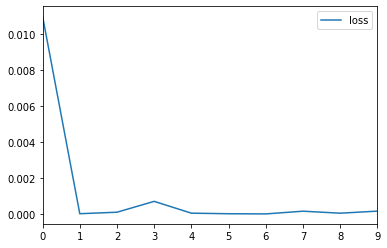

In [65]:
losses.plot()

### To predict, we will feed in the model with input batch of lenght defined.

In [0]:
#first_eval_batch = scaled_train[-length:]

In [0]:
##first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [0]:
#predection = model.predict(first_eval_batch)

In [0]:
#predection

In [0]:
#scaled_test[0]

### Taking the complete batch
Predecting of it. Appending it to the test batch.

In [0]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

#current_batch = first_eval_batch

for i in range(len(test)):

  current_prediction = model.predict(current_batch)[0]

  test_predictions.append(current_prediction) 
  
  current_batch = np.append(current_batch[:,1:,:],[[current_prediction]],axis =1)




In [72]:
test_predictions[0]

array([0.9491523], dtype=float32)

In [73]:
len(test_predictions)

50

In [0]:
true_prediction = scaler.inverse_transform(test_predictions)

In [75]:
len(true_prediction)

50

In [76]:
test["predicted"] = true_prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


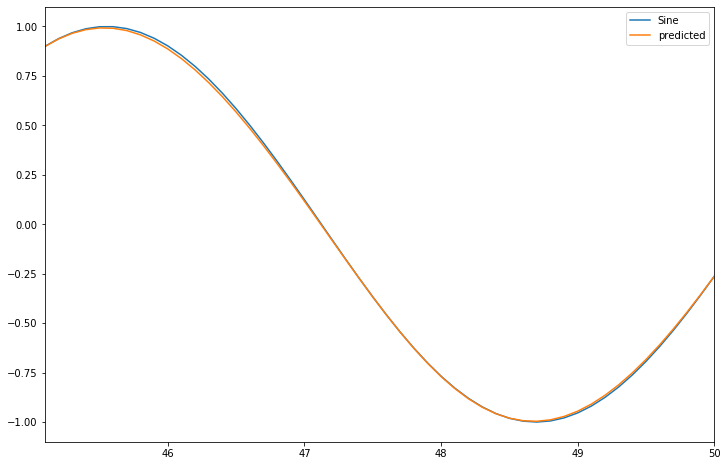

In [89]:
test.plot(figsize=(12,8))

### checking the early stopping 

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:

length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

#length should always be atleast one short of the data i.e. scaled_test.

In [0]:
#Retraining model with LSTM layer and validation generator, and early stopping
model = Sequential()
#choose number of neurons something related to our length of the sequence size.
model.add(LSTM(50,input_shape=(length,n_features))) 
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 10s 25ms/step - loss: 0.0169 - val_loss: 1.8190e-04
Epoch 2/20
402/402 [==============================] - 9s 22ms/step - loss: 1.4299e-04 - val_loss: 4.9328e-06
Epoch 3/20
402/402 [==============================] - 9s 21ms/step - loss: 1.4359e-04 - val_loss: 7.7280e-05
Epoch 4/20
402/402 [==============================] - 9s 22ms/step - loss: 2.6869e-04 - val_loss: 7.4177e-05


In [0]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

#current_batch = first_eval_batch

for i in range(len(test)):

  current_prediction = model.predict(current_batch)[0]

  test_predictions.append(current_prediction) 
  
  current_batch = np.append(current_batch[:,1:,:],[[current_prediction]],axis =1)

In [0]:
true_prediction = scaler.inverse_transform(test_predictions)

In [91]:
test["LSTM_Predictions"] = true_prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


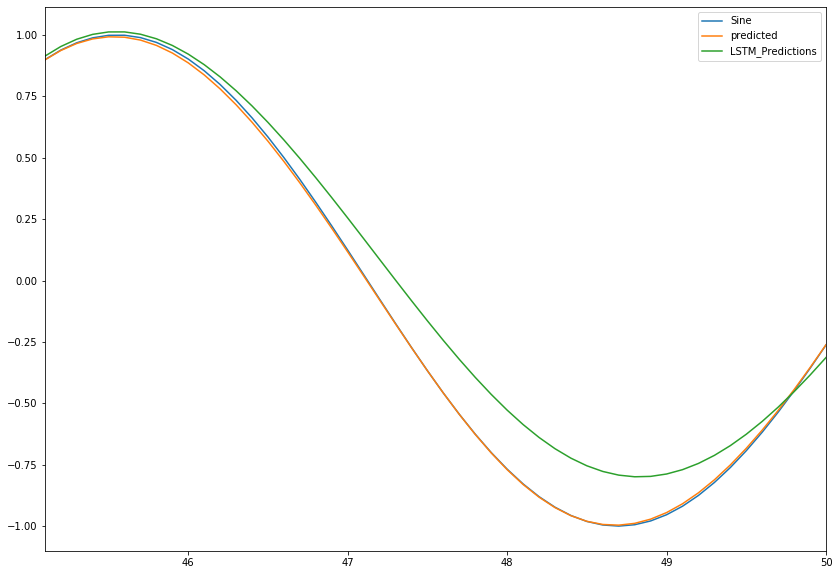

In [92]:
test.plot(figsize=(14,10))

In [0]:
full_scaled_data=MinMaxScaler()

scaled_full_data = full_scaled_data.fit_transform(dataset)

In [104]:
len(scaled_full_data)

501

In [0]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)

In [106]:
#Retraining model with LSTM layer and validation generator, and early stopping
model = Sequential()
#choose number of neurons something related to our length of the sequence size.
model.add(LSTM(50,input_shape=(length,n_features))) 
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

model.summary()

model.compile(optimizer='adam', loss='mse')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit_generator(generator,epochs=4)

  ...
    to  
  ['...']
Train for 452 steps
Epoch 1/4
452/452 [==============================] - 11s 24ms/step - loss: 0.0120
Epoch 2/4
452/452 [==============================] - 10s 21ms/step - loss: 6.8276e-05
Epoch 3/4
452/452 [==============================] - 9s 20ms/step - loss: 4.3111e-04
Epoch 4/4
452/452 [==============================] - 9s 20ms/step - loss: 9.4137e-05


In [0]:
forcast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

#current_batch = first_eval_batch

for i in range(25):

  current_prediction = model.predict(current_batch)[0]

  forcast.append(current_prediction) 
  
  current_batch = np.append(current_batch[:,1:,:],[[current_prediction]],axis =1)

In [0]:
forcast = scaler.inverse_transform(forcast)

In [113]:
#Creating forcasted index as per our dataset. 
forcast_index = np.arange(50.1,52.6,step=0.1)
forcast_index

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5])

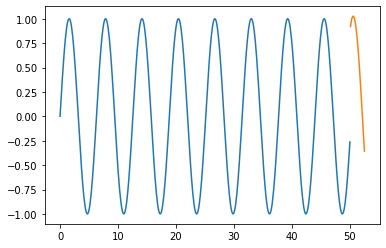

In [116]:
plt.plot(dataset.index,dataset['Sine'])
plt.plot(forcast_index,forcast)